## Airline Data Exploration

You are an analyst for the Russian domestic airline F9. It is important to understand the preferences of users who buy tickets to different destinations.

You have to study the database and analyze the demand of passengers for flights to cities where the largest cultural festivals take place.

**Step 1.  Python Analysis **

You have files that contain query results from previous jobs.

query_1.csv — first request result.

- *model* - airplane model
- *flights_amount* - number of flights for each model aircraft model in September 2018

query_3.csv - third query result

- *city* - city
- *average_flights* - average number of flights arriving in a city per day in September 2018

 For these two datasets you need:

- import files;
- to study the data in them;
- check data types for correctness;
- choose the top 10 cities by the number of flights;
- build graphs: aircraft models and the number of flights, cities and the number of flights, top 10 cities and the number of flights;
- draw conclusions for each of the graphs, explain the result.

**Step 2.  Hypothesis Testing with Python**

query_last.csv — last query result.

- *week_number* - week number
- *ticket_amount* - number of tickets sold per week
- *festival_name* - festival name
- *festival_week* - is there a festival this week

Test the hypothesis: “Average demand for tickets during festivals does not differ from average demand for tickets during normal times.”


*Before the implementation of this project, it was preceded by working with data using SQL*

```mysql

SELECT
    t.week_number,
    t.tickets_amount,
    t.festival_week,
    t.festival_name
FROM
(
    (SELECT
        EXTRACT(week from flights.departure_time) AS week_number,
        COUNT(ticket_flights.ticket_no) as tickets_amount
     FROM
         airports
     INNER JOIN
         flights ON airports.airport_code = flights.arrival_airport
     INNER JOIN
         ticket_flights ON flights.flight_id = ticket_flights.flight_id
     WHERE
         airports.city='Москва' AND CAST(flights.departure_time as date) BETWEEN '2018-07-23' and  '2018-09-30'
     GROUP BY
     week_number)
     as t1
    LEFT JOIN
        (SELECT
        festival_name,
        EXTRACT(week from festivals.festival_date) AS festival_week
        FROM
        festivals
        WHERE
        festivals.festival_city='Москва' AND CAST(festivals.festival_date as date) BETWEEN '2018-07-23' and  '2018-09-30'
        ) as t2
     ON
     t1.week_number = t2.festival_week
     ) as t

```

# 1. Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')
query_last = pd.read_csv('/datasets/query_last.csv')

In [3]:
query_1.info()
display(query_1)
query_3.info()
display(query_3)
query_last.info()
display(query_last)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [4]:
query_last['festival_name'] = query_last['festival_name'].fillna('no_festival') 
query_last['festival_week'] = query_last['festival_week'].fillna(-1)
query_last['festival_week'] = query_last['festival_week'].astype('int')
query_last.info()
display(query_last)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    10 non-null int64
festival_name    10 non-null object
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,-1,no_festival
3,33,51378,-1,no_festival
4,34,51492,-1,no_festival
5,35,51360,-1,no_festival
6,36,51386,36,Видфест
7,37,51670,-1,no_festival
8,38,51518,-1,no_festival
9,39,51623,-1,no_festival


In [5]:
print(query_3.isnull().sum())
print(query_3.duplicated().sum())

city               0
average_flights    0
dtype: int64
0


In [6]:
query_3['average_flights'] = query_3['average_flights'].astype('int')
query_3.sort_values('average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


In [7]:
query_1_sort = query_1.sort_values(['flights_amount'],ascending=False)
query_3_sort = query_3.sort_values(['average_flights'],ascending=True)
color_rectangle = np.random.rand(25, 3)

In [8]:
def histogram(data, n_bins, x, y, title, x_label, y_label,size_1,size_2):
    plt.figure(figsize=(size_1,size_2))
    plt.barh(x, y, color=color_rectangle)
    plt.title(title)
    plt.xlabel(x_label)
    plt.xticks(rotation=90) 
    plt.ylabel(y_label)

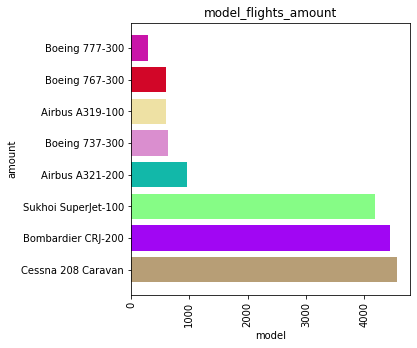

In [9]:
figure_1 = histogram(query_1_sort, 8, query_1_sort['model'], query_1_sort['flights_amount'],'model_flights_amount',
                    'model', 'amount', 5, 5)

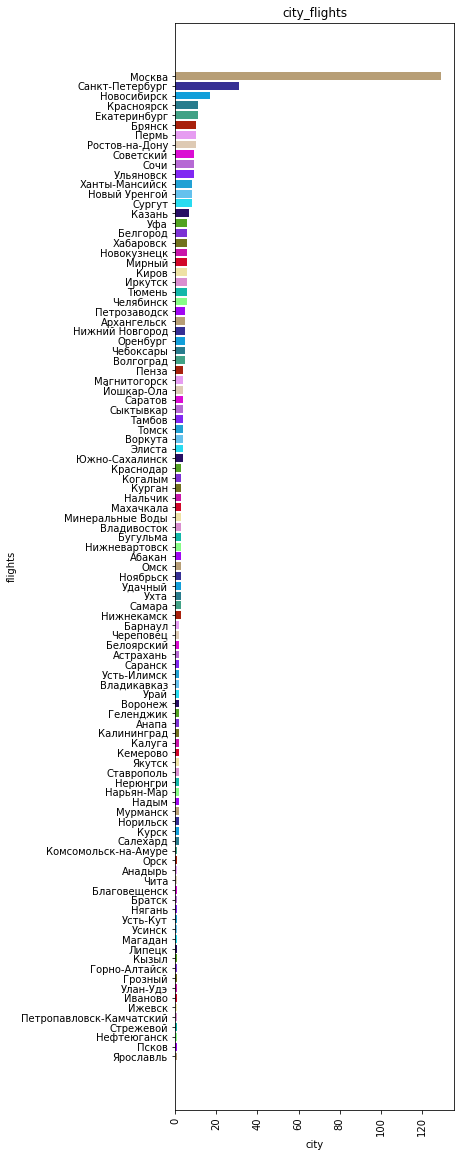

In [10]:
figure_2 = histogram(query_3_sort, 100, query_3_sort['city'], query_3_sort['average_flights'],'city_flights',
                    'city', 'flights',5,20)

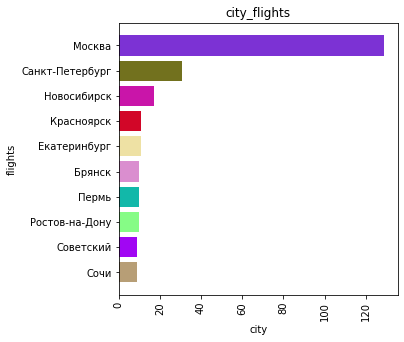

In [11]:
figure_2 = histogram(query_3_sort, 100, query_3_sort['city'].tail(10), query_3_sort['average_flights'].tail(10),'city_flights',
                    'city', 'flights',5,5)

Only one model of the aircraft from the above list of Russian production, but it is included in the top three in operation. Apparently the data is given not only for Russia, since the first two models of American production are operated in America.

The largest number of flights is in Moscow and St. Petersburg, which is logical, followed by cities that are quite remote from Moscow. The farther from Moscow, the more profitable it is to fly, the closer - it is better to use a train / car, so you can save more time

# 2. Hypothesis testing

The average demand for tickets during festivals does not differ from the average demand for tickets during normal times.

Let's put forward a null hypothesis: the average of two populations (demand, when there are festivals and when they are not) are equal. And the alternative is unequal. To test hypotheses, we use the t-test of the hypothesis about the equality of the means of two general populations.

In [12]:
def fest_func(row):
    i =row['festival_name']
    if i == 'no_festival':
        return 'no'
    else:
        return 'yes'
query_last['festival'] = query_last.apply(fest_func, axis=1)

fest_no = query_last.query('festival == "no"')
fest_yes = query_last.query('festival != "no"')

In [13]:
alpha = 0.05

results = st.ttest_ind(fest_no['ticket_amount'], fest_yes['ticket_amount'])
print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу для спроса на билеты")
else:
    print("Не получилось отвергнуть нулевую гипотезу для спроса")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу для спроса


p-value: 0.09688869045922928

Failed to reject the null hypothesis for demand

## CONCLUSION

Conducted data analytics, changed the data type in the columns to more appropriate one.

Diagrams are constructed by the number of flights of various aircraft models and to various cities.

The hypothesis about the demand for tickets is investigated.

It turns out that the demand is the same, but it is worth noting that in the populations there is a very small sample - 10 values for two populations is extremely small, for a more accurate answer, you need to increase the sample.